### REDES NEURONALES Regresion

**PERCEPTRON**

Utiliza lal inforamcion que viene de las variables y hace una SUMA ponderada

Esta es una operacion sencilla y lineal

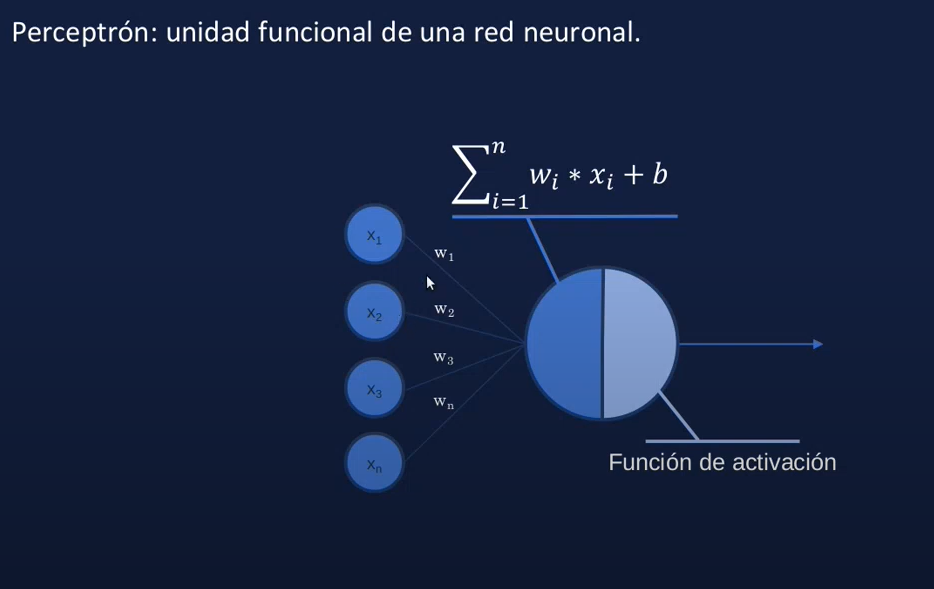

In [5]:
from IPython.display import Image
Image(filename='img/4.PNG') 

**NO LINEALIDAD**

La pcapacidad ed aprender operaciones no lineales está en la **Funciona de activacion**


Es el elemento de control de la infomracion de lo que va a pasar de una capa a otra

Requisito fundamental para una funcion de acitvacion ----------> Debe de ser **Deribable**





La funcion RELU esta más orientada a problemas de regresion

Y la Sigmoide y TANH estan mas orientadas a problemas de clasificacion.



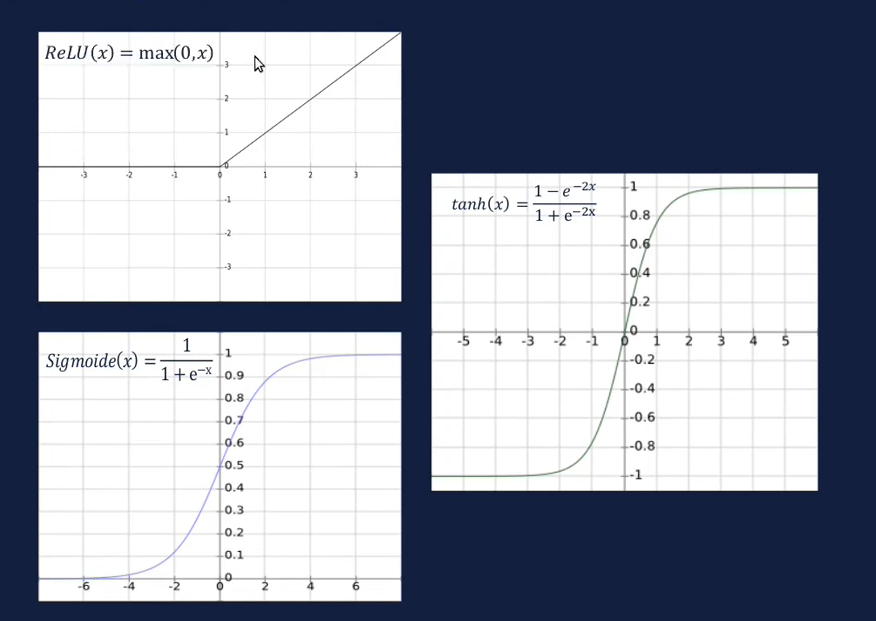

In [6]:
from IPython.display import Image
Image(filename='img/5.PNG') 

Tambien tenemos que determina que responsabilidad tiene cada peso en ese error.

Esto es un problema de optimizacion y se resulve con *BACK PROPAGATION**

Se puede implementar mediante varios procedimientos

EL mas utilizado es SGD ----> Desenso del gradiente Stolastico




REGRESION ------------------------------> Optimizaamos el RMSE

CLASIFICACION --------------------------> Optimizamos el **LogLos** (funcion logaritmica de perdida)

La fuincion de perdida **NO ES CONVEXA**

NO hay una estabilidad dentro del rendimiento

Es e problema se resulva ejecutando varias veces el algoritmo de entrenamiento , para llegar a ese peso que necesitamos.





<h1><span style="color:blue">RED NEURONAL REGRESION implementación</span></h1>

Entre mas capas ocultas y mas neuronas tengan esa capas, más complejo va a ser el modelo. El modelo va a ser más capaz de aprender relaciones complejas.

El problemes que entre más complejo el modelo , más posibilidad de caer en **OverFitting**



<h3><span style="color:blue">LAs redes neuronales están basadas en distancias.</span></h3>

<h3><span style="color:red">Es necesario aplicar el Escalado de datos</span></h3>

Esto lo hacemos para que las variables que esten en un rango mayor no le quiten importancia a las que estan en el rango menor.

Es necesario el escalado de datos para poner a todas las variables dentro de un mismo rango 

In [5]:
from pandas import read_csv 
from sklearn.neural_network import MLPRegressor 
import time, random 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 

import matplotlib.pyplot as plt

seed=random.seed(time.time()) 

PAra el ejercicio utilizo un problema de clasificacion **BINARIA**

- G

- H

In [6]:
seed=random.seed(time.time()) 

filename = 'comptagesvelo2015.csv'  
#data = read_csv(filename, names=col_names)  

data = read_csv(filename) 

data.head()


Date Unnamed: 1  Berri1  Boyer  Brébeuf  CSC (Côte Sainte-Catherine)  \
0  01/01/2015      00:00      58     12        4                           17   
1  02/01/2015      00:00      75      7        5                           15   
2  03/01/2015      00:00      79      7        3                            7   
3  04/01/2015      00:00      10      1       21                            0   
4  05/01/2015      00:00      42      0        2                            0   

   Maisonneuve_1  Maisonneuve_2  Maisonneuve_3  Notre-Dame  ...  \
0           33.0             49             21          16  ...   
1           30.0            113             27           9  ...   
2           30.0            107             36          12  ...   
3           10.0             35             29           1  ...   
4           27.0             90             21           1  ...   

   Pont_Jacques_Cartier  Rachel / Hôtel de Ville  Rachel / Papineau  \
0                   NaN                       58                 91   
1                   NaN                      109                177   
2                   NaN                       71                131   
3                   NaN                        6                 11   
4                   NaN                        0                  5   

   René-Lévesque  Saint-Antoine  Saint-Laurent U-Zelt Test  Saint-Urbain  \
0             24              3                        NaN            17   
1             32             13                        NaN            11   
2             33              5                        NaN            14   
3              6              1                        NaN             1   
4             49             20                        NaN             0   

   Totem_Laurier  University  Viger  
0             78          21      6  
1             57          77      4  
2            174          40      5  
3             20           6      0  
4             41          56     10  

[5 rows x 23 columns]

#### Primero

Divido los datos entre los inputs y el output

In [7]:
X = data[data.columns[:-1]] 


# NEcesito encontrar la Y
Y = data['class']  

KeyError: 'class'

#### Segundo

Divido con la funcion **train_test_split**

Le paso todo el conjunto de datos

Ento me divide en 70% para entrenamiento y 30% para test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed, stratify=Y)   

<h3><span style="color:red">Escalado de datos</span></h3>

Separar las variables que sean de tipo numerico de las categoricas.
Y con **EstandardScaler** le aplico un escaldo a esas variables numericas.

#### **NUMERICAS** ---------------> StandardScaler

In [36]:

scaler =StandardScaler()
X_train = scaler.fit_transform(X_train) 

X_test= scaler.transform(X_test)  


<span style="color:red">La función de activación: </span>Por defecto, la clase MLPClassifier tiene configurada la función de activación ReLU. El parámetro activation permite cambiar esta opción. 
- identity
- logistic
- tahn
- relu

Número y tamaño de las capas ocultas: Se realiza a través del parámetro <span style="color:red">hidden_layer_sizes</span> que utilizando una tupla de enteros determina el número de capas ocultas (tamaño de la tupla) y el número de nodos por capa de la red. 
- La capa de entrada siempre tendrá el número de dimensiones del problema y la de salida el número de clases del problema. 

El algoritmo de entrenamiento: Por defecto, la clase MLPClassifier tiene configurada el algoritmo Adam, un método de descenso de gradiente estocástico.

La tasa de entrenamiento: Controla el tamaño del paso en la actualización de los pesos. El parámetro que lo establece es learning_rate_init de tipo doble y por defecto con un valor de 0.001. Puede ser constante o dinámica. 

SOLVER -------------> El algoritmo de optimizacion que busca los mejores pesos que se adapten a este conjunto dentrenamiento.

- lbfgs (Este es el que funciona mejor) Es capaz de encontrar solucion más exacta, pero mucho mas constoso computacionalmente.
    - Utilizarlo cunado se tienen datasets pequeños, porque funciona mucho mas rapido y mejor.
- sgd
- adam (Descenso de gradiente Estocastico) Este tambien funciona muy bien para sataset grandes.

Estas son todo los parametro que necesitamos ajustar bien

Aqui de una vez le meto los patrones de entrenamiento y ya queda listo 

In [2]:

model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, activation='logistic', n_iter_no_change=50, solver='lbfgs').fit(X_train, y_train) 



NameError: name 'MLPClassifier' is not defined

Ahora tomamos los datos de test y los comparamos con el modelo ya entrenamo

In [38]:
y_pred = model.predict(X_test)  

In [39]:
bacc =  balanced_accuracy_score(y_pred, y_test) 

acc =  accuracy_score(y_pred, y_test) 
cm =  confusion_matrix(y_pred, y_test)  

print(bacc, acc) 

print(cm) 

0.8543508924611158 0.862776025236593
[[3386  469]
 [ 314 1537]]


Algo super interesante de este modelo es que te muestra la curva de interaccion a lo largo del aprendizaje

Esto es importante para ver si ese modelo se queda corto de entrenamiento y necesita aún más

In [41]:
plt.plot(model.loss_curve_)

AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'